<a href="https://colab.research.google.com/github/Bruno-P-S/projeto-analise-otica/blob/main/Venda_Otica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Planejamento (Business Case)**

Qual é o problema de negócio que estou tentando resolver?
O objetivo deste projeto é analisar o desempenho de vendas de uma ótica durante o ano de 2024 para identificar quais categorias de produtos e métodos de pagamento são mais lucrativos. A análise visa fornecer subsídios para a gestão de estoque e estratégias de marketing baseadas no comportamento de compra dos clientes.

**Quais perguntas preciso responder com os dados?**

Qual é o faturamento total acumulado no ano?

Quais são os produtos mais vendidos em termos de quantidade?

Qual categoria de produto (Lente, Armação ou Solar) gera o maior faturamento?

Como o faturamento se distribui ao longo dos meses do ano?

Qual a preferência dos clientes em relação aos métodos de pagamento?

**Quais são as fontes de dados disponíveis?**

A base de dados utilizada é um arquivo CSV gerado sinteticamente (vendas_otica.csv), contendo 300 registros de transações.

Os dados incluem:

Data: Data da venda.

Produto e Categoria: Descrição e agrupamento do item (ex: Lente Multifocal, Armação).

Preço e Quantidade: Valores unitários e volume vendido.

Pagamento: Forma de pagamento utilizada (Cartão, PIX, Dinheiro).

# **Esboço do Relatório (Estrutura do Notebook)**

**Introdução e Objetivo**

Apresentação do cenário de varejo ótico e a importância de monitorar métricas de faturamento por categoria para otimizar a lucratividade.

Análises que serão feitas
Limpeza e Tipagem: Conversão de colunas de data e verificação de valores nulos.

Engenharia de Dados: Criação da coluna Faturamento (Preço x Quantidade) e extração do mês da venda.

Agrupamentos: Uso da função groupby para consolidar dados por Produto, Categoria e Mês.

**Gráficos que serão gerados**

Gráfico de Barras: Faturamento total por Produto para identificar os "carros-chefes".

Gráfico de Linha: Evolução mensal do faturamento para identificar sazonalidade.

Gráfico de Pizza/Barras: Distribuição de vendas por Categoria.

**Conclusão Esperada**

Identificar se produtos de alto valor (como Lentes Multifocais) compensam o volume de vendas de produtos mais baratos e sugerir ações baseadas no mês de maior pico de vendas.

In [ ]:
import pandas as pd
import random

produtos = [
    ("Armação Masculina", "Armação", 350),
    ("Armação Feminina", "Armação", 320),
    ("Lente Multifocal", "Lente", 900),
    ("Lente Simples", "Lente", 250),
    ("Óculos de Sol", "Solar", 450),
    ("Lente Antirreflexo", "Lente", 500)
]

pagamentos = ["Dinheiro", "Cartão", "PIX"]

dados = []

for _ in range(300):
    produto = random.choice(produtos)
    data = pd.Timestamp("2024-01-01") + pd.to_timedelta(random.randint(0, 365), unit="d")

    dados.append([
        data,
        produto[0],
        produto[1],
        produto[2],
        random.randint(1, 3),
        random.choice(pagamentos)
    ])

df = pd.DataFrame(dados, columns=[
    "Data", "Produto", "Categoria", "Preco", "Quantidade", "Pagamento"
])

df.to_csv("vendas_otica.csv", index=False)

df.head()

,Data,Produto,Categoria,Preco,Quantidade,Pagamento
0,2024-11-23,Lente Multifocal,Lente,900,3,Cartão
1,2024-07-23,Armação Masculina,Armação,350,1,PIX
2,2024-08-16,Lente Antirreflexo,Lente,500,3,Dinheiro
3,2024-04-13,Lente Antirreflexo,Lente,500,2,Dinheiro
4,2024-02-25,Armação Masculina,Armação,350,1,Cartão


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        300 non-null    datetime64[ns]
 1   Produto     300 non-null    object        
 2   Categoria   300 non-null    object        
 3   Preco       300 non-null    int64         
 4   Quantidade  300 non-null    int64         
 5   Pagamento   300 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 14.2+ KB


In [ ]:
df.head()

,Data,Produto,Categoria,Preco,Quantidade,Pagamento
0,2024-11-23,Lente Multifocal,Lente,900,3,Cartão
1,2024-07-23,Armação Masculina,Armação,350,1,PIX
2,2024-08-16,Lente Antirreflexo,Lente,500,3,Dinheiro
3,2024-04-13,Lente Antirreflexo,Lente,500,2,Dinheiro
4,2024-02-25,Armação Masculina,Armação,350,1,Cartão


In [ ]:
df["Faturamento"] = df["Preco"] * df["Quantidade"]

In [ ]:
df["Faturamento"].sum()

np.int64(288600)

In [ ]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

,Quantidade
Produto,
Lente Antirreflexo,123
Armação Masculina,117
Armação Feminina,105
Lente Multifocal,103
Óculos de Sol,93
Lente Simples,72


In [ ]:
df.groupby("Categoria")["Faturamento"].sum().sort_values(ascending=False)

,Faturamento
Categoria,
Lente,172200
Armação,74550
Solar,41850


In [ ]:
df["Mes"] = df["Data"].dt.month

In [ ]:
df.groupby("Mes")["Faturamento"].sum()

,Faturamento
Mes,
1,23070
2,27820
3,26450
4,26520
5,24250
6,25430
7,17620
8,27940
9,31570


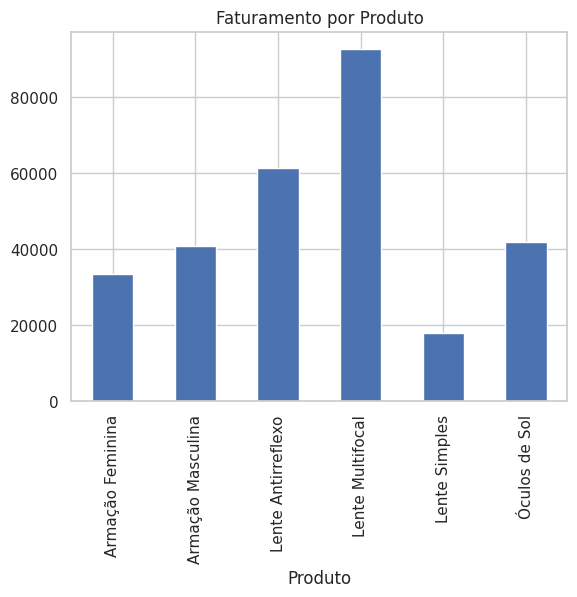

In [29]:
import matplotlib.pyplot as plt

df.groupby("Produto")["Faturamento"].sum().plot(kind="bar")

plt.title("Faturamento por Produto")
plt.show()

In [24]:
import plotly.express as px

# Group data and create interactive bar chart
fig = px.bar(df.groupby("Produto")["Faturamento"].sum().reset_index(),
             x="Produto",
             y="Faturamento",
             title="Faturamento por Produto (Interativo)")

# Display the interactive chart
fig.show()

In [22]:
import plotly.express as px

faturamento_mensal = df.groupby('Mes')['Faturamento'].sum().reset_index()

fig = px.line(faturamento_mensal,
              x='Mes',
              y='Faturamento',
              title='Evolução Mensal do Faturamento (Interativo)',
              labels={'Mes': 'Mês', 'Faturamento': 'Faturamento Total'})

fig.update_xaxes(tickmode='array', tickvals=list(range(1, 13)), ticktext=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

fig.show()

In [20]:
import plotly.express as px

faturamento_por_categoria = df.groupby('Categoria')['Faturamento'].sum().reset_index()

fig = px.pie(faturamento_por_categoria,
             values='Faturamento',
             names='Categoria',
             title='Distribuição de Faturamento por Categoria (Interativo)')

fig.show()


# Relatório do E-book: Treinee IA

## 1. Visão Geral e Cultura Profissional

O e-book inicia estabelecendo as bases do ambiente corporativo do **Eniac Academy**. O foco inicial está no desenvolvimento do profissional por trás do código:

*
**Código de Conduta:** Define valores como integridade, responsabilidade e confidencialidade. Estabelece padrões de pontualidade e o *dress code* institucional.


*
**Hub de Carreiras:** Oferece ferramentas de autoconhecimento e consultoria de carreira para alinhar o perfil do aluno ao mercado de trabalho.


*
**Liderança e Soft Skills:** Enfatiza que liderança não é apenas cargo, mas a capacidade de influenciar e ter empatia, comunicação assertiva e flexibilidade.



## 2. Conteúdo Técnico e Prático

A trilha técnica é estruturada de forma progressiva, do entendimento conceitual à automação avançada:

Capítulo 2: Introdução à IA e Dados
Nesta fase inicial, o foco está nos fundamentos teóricos. O aluno aprende a distinguir entre Inteligência Artificial, Machine Learning e Análise de Dados. É introduzida a metodologia CRISP-DM, que serve como o padrão de ouro para a gestão de projetos de dados, orientando desde o entendimento do negócio até a implantação da solução.

Capítulo 3: Fundamentos de Lógica com Python
O e-book apresenta o Python como a ferramenta principal devido à sua versatilidade. Os tópicos incluem estruturas de dados fundamentais, como listas e dicionários, além da criação de scripts para a manipulação básica de arquivos nos formatos CSV e TXT, preparando o terreno para análises mais complexas.

Capítulo 4: Análise e Manipulação com Pandas
Este é o coração técnico da trilha. O conteúdo foca na biblioteca Pandas, ensinando como utilizar DataFrames para carregar grandes volumes de dados. O aprendizado envolve técnicas de limpeza (tratamento de dados ausentes), filtros inteligentes, seleções específicas e agrupamentos para extrair métricas rápidas.

Capítulo 5: Visualização de Dados (Storytelling)
A técnica se une à comunicação. Utilizando as bibliotecas Matplotlib e Seaborn, o conteúdo ensina a transformar números em gráficos de barras, linhas e dispersão. O objetivo é criar dashboards informativos que facilitem o "Storytelling", ou seja, a capacidade de contar uma história clara através dos dados.

Capítulo 6: Automação de Processos (RPA)
O último pilar técnico trata da eficiência operacional. O aluno aprende noções de RPA (Robotic Process Automation) e o uso de scripts para automatizar tarefas repetitivas. Também é abordada a integração com sistemas externos via APIs, permitindo que a análise de dados e a automação trabalhem em conjunto.


## 3. Boas Práticas, Ética e Versionamento

O material dedica seções críticas à qualidade do trabalho entregue:

*
**Boas Práticas:** Foca em código limpo (*Clean Code*), uso de indentação correta, nomes descritivos de variáveis e documentação útil.


*
**Ética em IA:** Alerta sobre o **viés (bias)** em algoritmos, a necessidade de transparência e a conformidade com a **LGPD**.


*
**Git e GitHub:** Ensina o controle de versão para garantir a reprodutibilidade dos projetos e a criação de um portfólio profissional online.



## 4. Projeto Final: O Case Real

O e-book encerra com o **Capítulo 9**, que orienta a construção de uma análise preditiva completa. O projeto final deve ser documentado em um Jupyter Notebook e publicado no GitHub, contendo obrigatoriamente:

1. Um problema de negócio claro.


2. Análise exploratória de dados (EDA).


3. Visualizações que contem uma história.


4. Relatório final com recomendações estratégicas.



---

**Conclusão:** O e-book é uma ferramenta estratégica que não apenas ensina "como programar", mas "como ser um profissional de dados" completo, unindo ética, técnica e visão de negócio.